In [11]:
from minisom import MiniSom
import numpy as np
import pandas as pd

data = pd.read_csv('diabetes.csv', sep=',', engine='python')
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1,3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=1, neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 2.6089287328810897


In [12]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

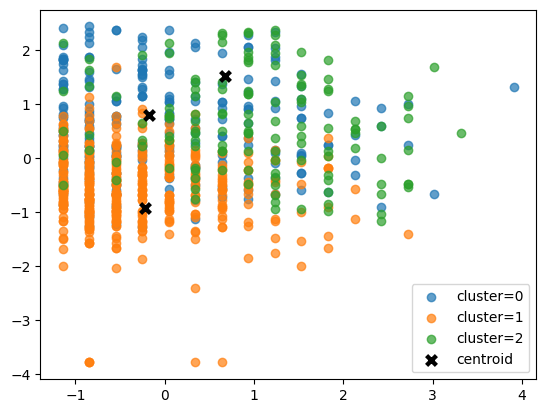

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=5, linewidths=10, color='k', label='centroid')
plt.legend();